# Lab 03 - Trực quan dữ liệu địa lý

### Bài 1

1. Cho `district-boundary-hcm-city.geojson`. Dùng geopandas để đọc và hiển thị dữ liệu dạng
polygon

2. Đọc dữ liệu trong sheet `location của file HCMC_location. => tìm hiểu dữ liệu location

3. Vẽ scatterplot gồm lat.long của dữ liệu của câu 2

4. Kết hợp polygon ở câu 1 và scatterplot ở câu 3 để vẽ thành một biểu đồ chung

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
#1
geo_df = gpd.read_file('district-boundary-hcm-city.geojson')
geo_df.head()

Skipping field rpath: unsupported OGR type: 5


,id,name,localname,timestamp,SRID,admin_level,tags,geometry
0,3850184,Saigon South,Khu đô thị Nam Sài Gòn,2016-03-18 23:05:02+01:00,4326,5,"{ ""name"": ""Khu đô thị Nam Sài Gòn"", ""name:en"":...","MULTIPOLYGON (((106.69344 10.72213, 106.69475 ..."
1,3797166,Binh Thanh District,Quận Bình Thạnh,2016-03-18 23:05:02+01:00,4326,6,"{ ""name"": ""Quận Bình Thạnh"", ""name:en"": ""Binh ...","MULTIPOLYGON (((106.68386 10.80711, 106.68388 ..."
2,2587287,District 1,Quận 1,2016-03-18 23:05:02+01:00,4326,6,"{ ""name"": ""Quận 1"", ""name:en"": ""District 1"", ""...","MULTIPOLYGON (((106.68165 10.76543, 106.68187 ..."
3,3819816,District 3,Quận 3,2016-03-18 23:05:02+01:00,4326,6,"{ ""name"": ""Quận 3"", ""name:en"": ""District 3"", ""...","MULTIPOLYGON (((106.66422 10.78714, 106.66457 ..."
4,2778323,District 4,Quận 4,2016-03-18 23:05:02+01:00,4326,6,"{ ""name"": ""Quận 4"", ""name:en"": ""District 4"", ""...","MULTIPOLYGON (((106.68639 10.75184, 106.68641 ..."


<Axes: >

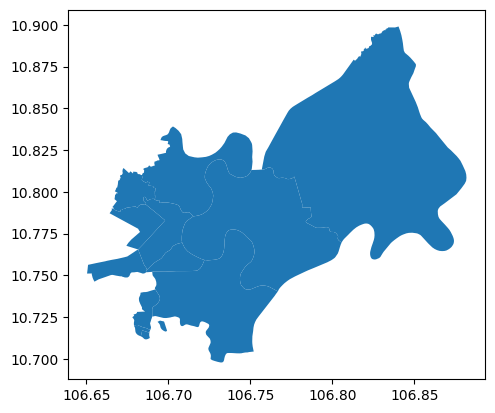

In [3]:
geo_df.plot()

In [4]:
#2
hcmc = gpd.read_file('HCMC_location.xlsx', layer= 'Location')
hcmc.head()

,STT,ID,Name,Bourough,Postal cost,Latitude,Longitude,Population,Population_all,Avg_land_price
0,1.0,760.0,Quận 1,"Vietnam, Quan 1",None,10.775659,106.700424,193.632,193632.0,59852096.0
1,2.0,761.0,Quận 12,"Vietnam, Quan 12",None,10.867153,106.641332,510.326,510326.0,3505942.0
2,3.0,762.0,Quận Thủ Đức,"Vietnam, Thu Duc",None,10.849409,106.753705,528.413,528413.0,5249286.0
3,4.0,763.0,Quận 9,"Vietnam, Quan 9",None,10.842840,106.828685,290.620,290620.0,3337584.0
4,5.0,764.0,Quận Gò Vấp,"Vietnam, Go Vap",None,10.838678,106.665290,634.146,634146.0,9873267.0


In [5]:
hcmc.describe()

,STT,ID,Latitude,Longitude,Population,Population_all,Avg_land_price
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,2.400000e+01
mean,12.500000,772.333333,10.807778,106.706724,343.659542,343659.541667,1.449284e+07
std,7.071068,8.323182,0.159094,0.158143,174.592145,174592.144782,1.460972e+07
min,1.000000,760.000000,10.508327,106.513197,74.960000,74960.000000,7.621540e+05
25%,6.750000,765.750000,10.752544,106.639808,191.905750,191905.750000,3.817255e+06
50%,12.500000,771.500000,10.780014,106.674109,300.399000,300399.000000,9.640205e+06
75%,18.250000,777.250000,10.839718,106.712251,470.366000,470366.000000,1.959694e+07
max,24.000000,787.000000,11.427531,107.361230,686.474000,686474.000000,5.985210e+07


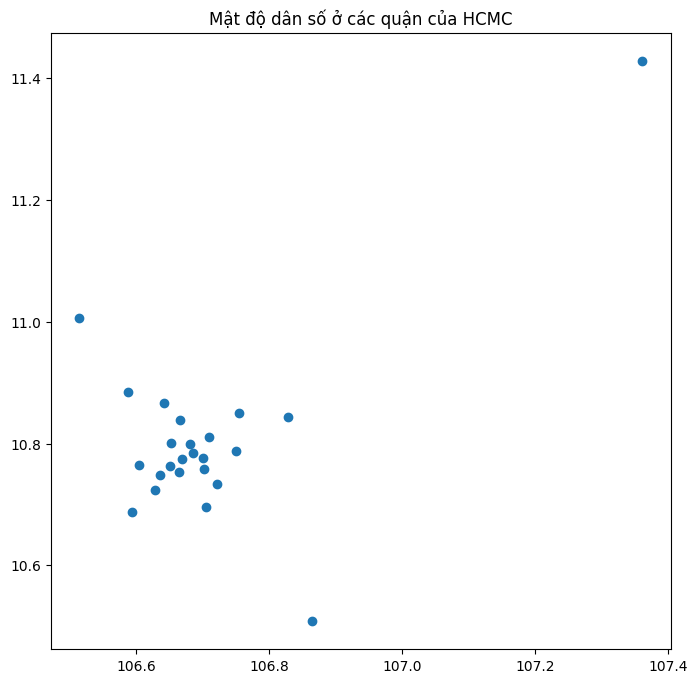

In [6]:
#3
plt.figure(figsize=(8,8))
plt.scatter(hcmc.Longitude, hcmc.Latitude)
plt.title("Mật độ dân số ở các quận của HCMC")
plt.show()

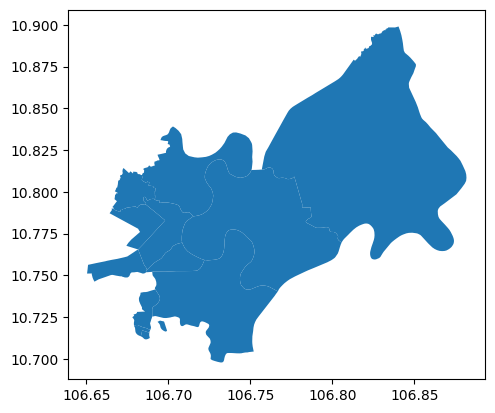

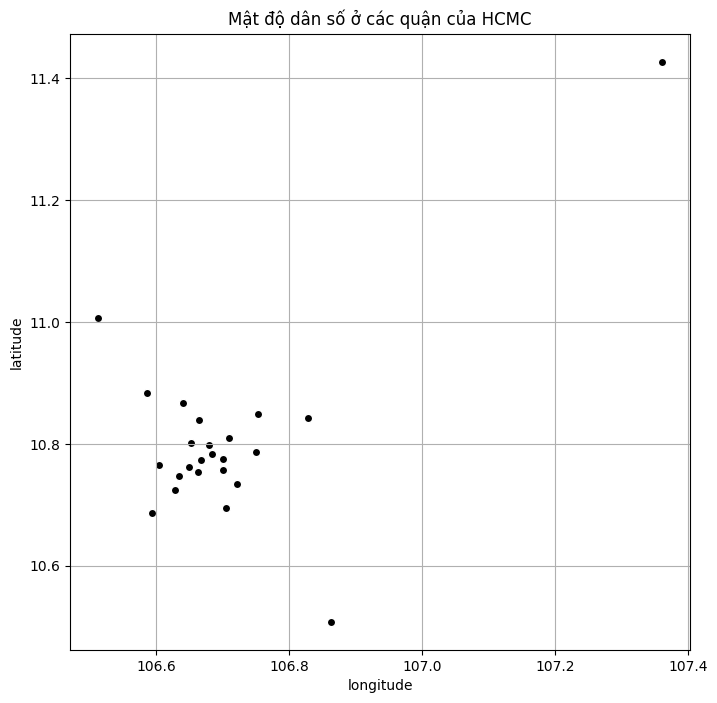

In [7]:
geo_df.plot()

plt.figure(figsize=(8,8))
plt.scatter(hcmc.Longitude, hcmc.Latitude, c='black', edgecolors='white')

plt.title("Mật độ dân số ở các quận của HCMC")
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.grid()
plt.show()

### Bài 2

Dữ liệu `Canada.xlsx` chứa thông tin nhập cư vào Canada từ năm 1980 đến năm 2013. Bộ dữ liệu chứa dữ liệu hàng năm về dòng người di cư đến Canada được ghi nhận, trình bày thông tin inflows and outflows theo nơi sinh, quốc tịch hoặc nơi cư trú trước đó / tiếp theo cho cả người nước ngoài và quốc tịch. Chúng tôi sẽ tập trung vào dữ liệu nhập cư Canada

#### Map

1. Hiển thị bản đồ thế giới

2. Tạo bản đồ với center là Canada (location=[56.130, -106.35]) và zoom level (zoom_start=4)

3. Tạo Stamen Toner map với center là Canada với zoom level là 4.

4. Tạo Stamen Terrain với center là Canada với zoom level là 4.

5. Tạo Mapbox Bright Map với center là Canada with zoom level 6

#### Choropleth Map

1. Đọc dữ liệu `Canada.xlsx` và gán vào df_can, tìm hiểu về dữ liệu với: describe, head, shape,
columns

2. Làm sạch dữ liệu: bỏ đi những cột không cần thiết như 'AREA','REG','DEV','Type','Coverage'
đổi tên cho một số cột 'OdName' => 'Country', 'AreaName' => 'Continent', 'RegName' => 'Region'. Để nhất quán tạo tên tất cả các cột trong dữ liệu là kiểu string. Thêm cột total chứa tổng lượng nhập cư các năm

3. Xem thông tin dữ liệu lúc này: head, shape

4. Tạo danh sách các năm từ 1980 đến 2013.

5. Lấy file GeoJSON có tên là `world_countries.json`

6. tạo world map, với center [0, 0] là latitude và longitude, zoom level là 2, sử dụng tiles là Mapbox Bright

7. Tạo choropleth map sử dụng total nhập cư của từng quốc gia vào Canada từ năm 1980 đến
năm 2013

8. Chỉnh threshold = 0 thay cho threshold = -6,918, tạo lại choropleth map sử dụng total nhập cư
của từng quốc gia vào Canada từ năm 1980 đến năm 2013

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import folium
import xyzservices.providers as xyz

In [9]:
#MAP
#1
world_map = folium.Map()
world_map

In [10]:
#2
canada_longitude = -106.35
canada_latitude = 56.130
canada_map = folium.Map(location=[canada_latitude, canada_longitude], zoom_start=4)
canada_map

---

In [11]:
my_api = '449ab829-3a1a-49d9-8cea-b6707175dd00'

In [12]:
tile_provider = xyz.Stadia.StamenToner
m = folium.Map(location=[canada_latitude, canada_longitude], zoom_start=4)
#Update the URL to include the API key placeholder
tile_provider["url"] = tile_provider["url"] + "?api_key={api_key}"

#Create the folium TileLayer, specifying the API key
folium.TileLayer(
    tiles=tile_provider.build_url(api_key=my_api),
    attr=tile_provider.attribution,
    name=tile_provider.name
).add_to(m)

folium.LayerControl().add_to(m)
m

In [13]:
#4
tile_provider_1 = xyz.Stadia.StamenTerrain
m = folium.Map(location=[canada_latitude, canada_longitude], zoom_start=4)
#Update the URL to include the API key placeholder
tile_provider_1["url"] = tile_provider_1["url"] + "?api_key={api_key}"

#Create the folium TileLayer, specifying the API key
folium.TileLayer(
    tiles=tile_provider_1.build_url(api_key=my_api),
    attr=tile_provider_1.attribution,
    name=tile_provider_1.name
).add_to(m)

folium.LayerControl().add_to(m)
m

In [14]:
#4
tile_provider_2 = xyz.Stadia.Mapbix
m = folium.Map(location=[canada_latitude, canada_longitude], zoom_start=4)
#Update the URL to include the API key placeholder
tile_provider_2["url"] = tile_provider_2["url"] + "?api_key={api_key}"

#Create the folium TileLayer, specifying the API key
folium.TileLayer(
    tiles=tile_provider_2.build_url(api_key=my_api),
    attr=tile_provider_2.attribution,
    name=tile_provider_2.name
).add_to(m)

folium.LayerControl().add_to(m)
m

AttributeError: Mapbix